In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('credit_card_approval.csv')
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,JOB,BEGIN_MONTHS,STATUS,TARGET
0,5065438,F,Y,N,2+ children,270000.0,Secondary / secondary special,Married,With parents,-13258,-2300,1,0,0,0,Managers,-6,C,0
1,5142753,F,N,N,No children,81000.0,Secondary / secondary special,Single / not married,House / apartment,-17876,-377,1,1,1,0,Private service staff,-4,0,0
2,5111146,M,Y,Y,No children,270000.0,Higher education,Married,House / apartment,-19579,-1028,1,0,1,0,Laborers,0,C,0
3,5010310,F,Y,Y,1 children,112500.0,Secondary / secondary special,Married,House / apartment,-15109,-1956,1,0,0,0,Core staff,-3,0,0
4,5010835,M,Y,Y,2+ children,139500.0,Secondary / secondary special,Married,House / apartment,-17281,-5578,1,1,0,0,Drivers,-29,0,0


In [3]:
df.isna().any()

ID                     False
CODE_GENDER            False
FLAG_OWN_CAR           False
FLAG_OWN_REALTY        False
CNT_CHILDREN           False
AMT_INCOME_TOTAL       False
NAME_EDUCATION_TYPE    False
NAME_FAMILY_STATUS     False
NAME_HOUSING_TYPE      False
DAYS_BIRTH             False
DAYS_EMPLOYED          False
FLAG_MOBIL             False
FLAG_WORK_PHONE        False
FLAG_PHONE             False
FLAG_EMAIL             False
JOB                    False
BEGIN_MONTHS           False
STATUS                 False
TARGET                 False
dtype: bool

No missing data in all columns.

<Axes: xlabel='DAYS_BIRTH'>

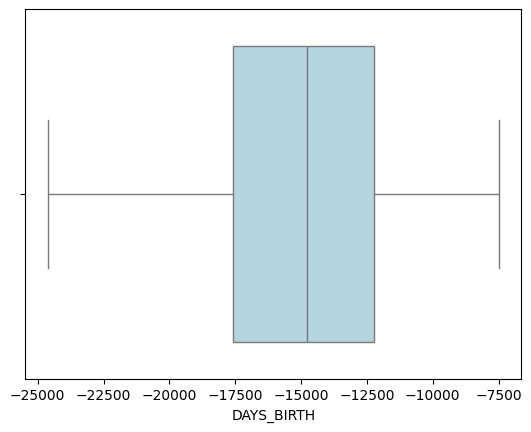

In [7]:
sns.boxplot(data=df['DAYS_BIRTH'], color='lightblue',orient="h")

In [9]:
df['DAYS_BIRTH'].describe(percentiles=[0.25,0.5,0.75,1])

count    537667.000000
mean     -15010.958999
std        3416.418092
min      -24611.000000
25%      -17594.000000
50%      -14785.000000
75%      -12239.000000
100%      -7489.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

Days_Birth is the feature for subject's age. The negative means the how many days before this dataset is created. Here we can observe the people's average age is around -14785 days, which would be 40 years old. Also, there is no outliers in this features. Even the largest age is around 60s, this feature is pretty cleaning. We just to remove negative sign and convert back to normal years to make it easier to use.

<Axes: xlabel='DAYS_EMPLOYED', ylabel='Count'>

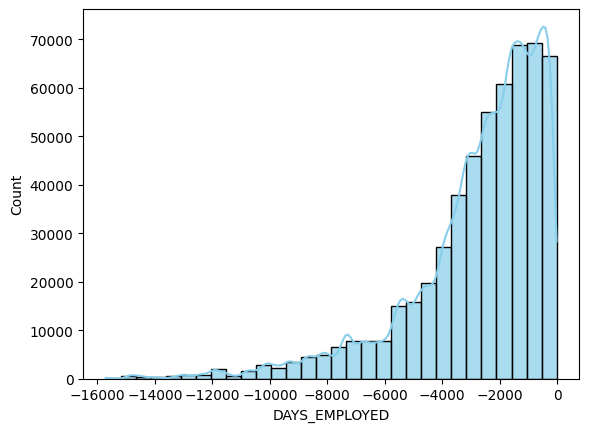

In [17]:
sns.histplot(df['DAYS_EMPLOYED'], bins=30, kde=True, color='skyblue', alpha=0.7)

<Axes: xlabel='DAYS_EMPLOYED'>

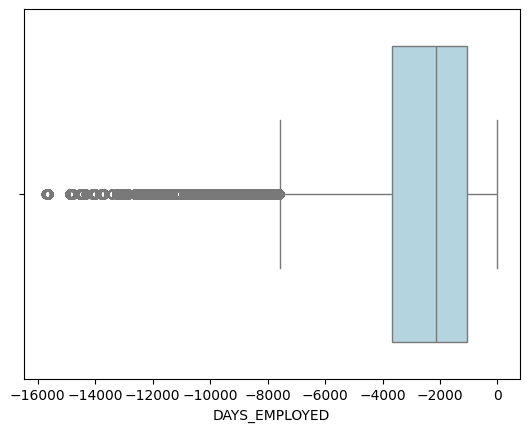

In [18]:
sns.boxplot(data=df['DAYS_EMPLOYED'], color='lightblue',orient="h")

In [19]:
df['DAYS_EMPLOYED'].describe(percentiles=[0.25,0.5,0.75,1])

count    537667.000000
mean      -2762.029935
std        2393.919456
min      -15713.000000
25%       -3661.000000
50%       -2147.000000
75%       -1050.000000
100%        -17.000000
max         -17.000000
Name: DAYS_EMPLOYED, dtype: float64

Days_employed works in the same fashion as days_birth. The negative sign means how many work days before the dataset is created, so the more negatiev, the longer work history for a person. This feature has different distribution compared to the age distribution. The days_employed is skewed to the right, indicating a lot of people does not have a long work history. This could be one of the most important features, since a person who has longer work history, they should less likely to default a credit card

In [20]:
Flag_Mobil_type = df['FLAG_MOBIL'].value_counts()   
Flag_Mobil_type

FLAG_MOBIL
1    537667
Name: count, dtype: int64

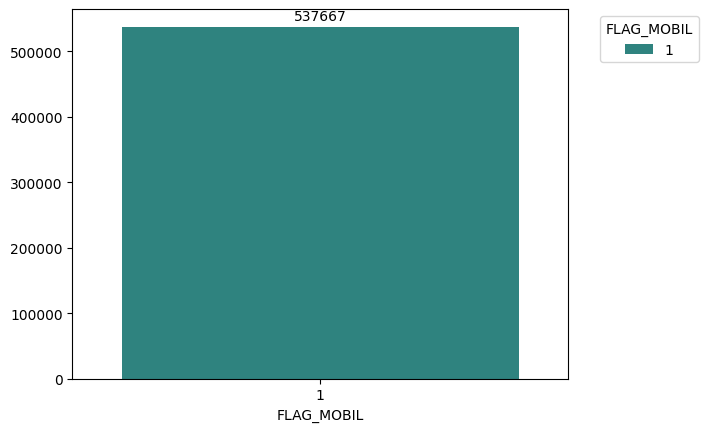

In [39]:
sns.barplot(y=Flag_Mobil_type.values, x=Flag_Mobil_type.index, palette="viridis",hue=Flag_Mobil_type.index)
for i in range(len(Flag_Mobil_type)):
    plt.text(i, Flag_Mobil_type.values[i] + 10000, f"{Flag_Mobil_type.iloc[i]}", color="black", ha="center")
plt.legend(title="FLAG_MOBIL", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

FLAG_MOBIL indicate whether a person has a mobile phone or not. From the visualization, we can see all subjects have mobile phone, so it cannot provide model with much information, since there is no variance in the feature. Thus, we shouldn't include in our model to increase its complexity. 

In [48]:
FLAG_WORK_PHONE_type = df['FLAG_WORK_PHONE'].value_counts()
print(FLAG_WORK_PHONE_type/ df['FLAG_WORK_PHONE'].value_counts().sum())


FLAG_WORK_PHONE
0    0.718385
1    0.281615
Name: count, dtype: float64


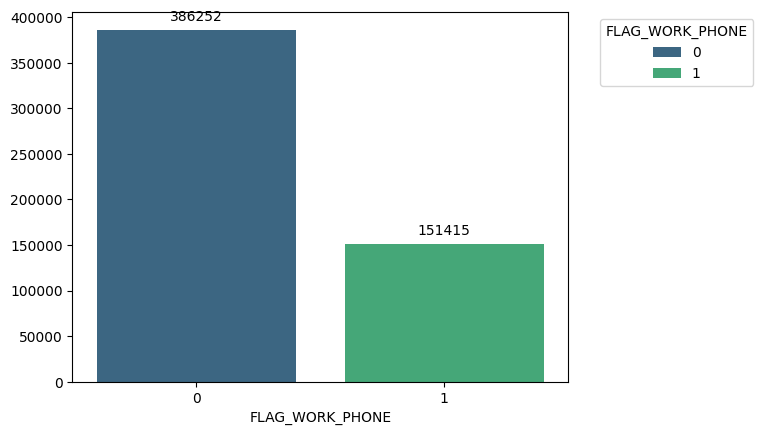

In [49]:
sns.barplot(y=FLAG_WORK_PHONE_type.values, x=FLAG_WORK_PHONE_type.index, palette="viridis",hue=FLAG_WORK_PHONE_type.index)
for i in range(len(FLAG_WORK_PHONE_type)):
    plt.text(i, FLAG_WORK_PHONE_type.values[i] + 10000, f"{FLAG_WORK_PHONE_type.iloc[i]}", color="black", ha="center")

plt.legend(title="FLAG_WORK_PHONE", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

FLAG_WORK_PHONE indicate whether a person has a work phone or not. This work phone should be used primarily for business purposes. It may be a landline at the office or a mobile phone assigned to an employee to stay connected with colleagues or clients. From the visualization, we can see around 28 % of subjects have the work phone, which should be able to provide some information to our model.If a employee works in a company who assign work phone, they should have a good salary, which is a good sign for credit card loan. Also, since these are binary features, we don't need to do one-hot encoding to increase the complexity. 

In [46]:
FLAG_PHONE_type = df['FLAG_PHONE'].value_counts()
print(FLAG_PHONE_type/ df['FLAG_PHONE'].value_counts().sum())

FLAG_PHONE
0    0.701107
1    0.298893
Name: count, dtype: float64


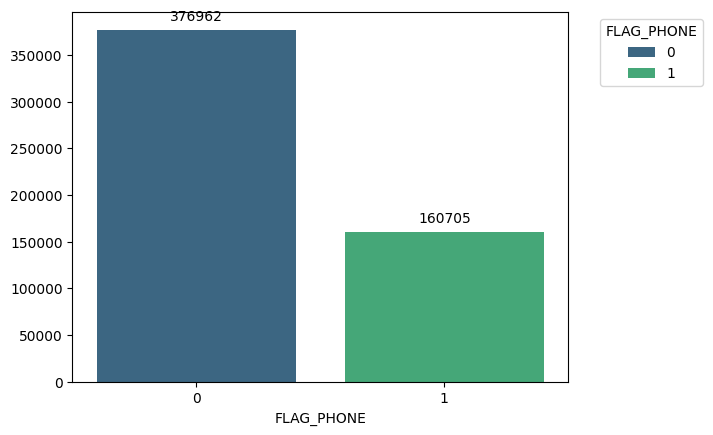

In [50]:
sns.barplot(y=FLAG_PHONE_type.values, x=FLAG_PHONE_type.index, palette="viridis",hue=FLAG_PHONE_type.index)
for i in range(len(FLAG_PHONE_type)):
    plt.text(i, FLAG_PHONE_type.values[i] + 10000, f"{FLAG_PHONE_type.iloc[i]}", color="black", ha="center")

plt.legend(title="FLAG_PHONE", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

FLAG_PHONE is feature that indicate where a person has a phone/landline phone. This distribution is pretty similar to the work_phone. Around 70% of people does not have a phone/landline, and 30% of people have them, so we need to conduct a correlation analysis to check how correlated features are in our table to avoid multi-linearity. 